In [15]:
import pathlib
import pickle
import numpy as np
# from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import metrics

def get_acc(data):
    total = data['tp'] + data['tn'] + data['fp'] + data['fn']
    acc = (data['tp'] + data['tn']) / total
    return acc

def get_fpr(data):
    fpr = data['fp'] / (data['fp'] + data['tn'])
    return fpr

def get_fnr(data):
    fnr = data['fn'] / (data['fn'] + data['tp'])
    return fnr

def get_tpr(data):
    tpr = data['tp'] / (data['tp'] + data['fn'])
    return tpr

In [16]:
results = None
name = 'testing_results.bin'
results = pickle.load(open(name,'rb'))

In [17]:
exclude = ['no_adv_training', 'vanilla', 'network_no_mask']
for x in exclude:
    if(x in results):
        del results[x]
for result in results:
    if(result == 'main'):
        results[result]['linestyle'] = 'solid'
    else:
        results[result]['linestyle'] = 'dotted'

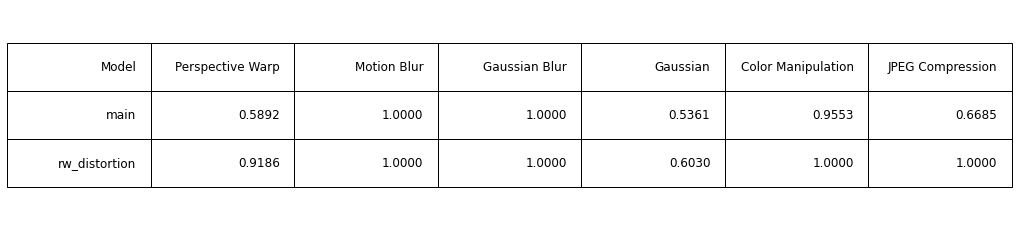

In [18]:
table_data = [['Model','Perspective Warp','Motion Blur','Gaussian Blur','Gaussian','Color Manipulation','JPEG Compression']]
# table_data = [['Model','Perspective Warp','Motion Blur','Gaussian Blur']]

for result in results:
    rw_score = results[result]['rw_score']
    table_data.append([result ,'%.4f' % rw_score['perspective_warp'], '%.4f' % rw_score['motion_blur'], '%.4f' % rw_score['gaussian_blur'], 
    '%.4f' % rw_score['gaussian'], '%.4f' % rw_score['color_manipulation'], '%.4f' % rw_score['jpeg_compression']])

# table_data.sort(key = lambda table_data: table_data[1], reverse=True)

fig, ax = plt.subplots()


table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(3,4)
ax.axis('off')

# plt.figure(figsize=(16,8))
# plt.ylabel('AUC')
# plt.xlabel('Model')
# plt.title(f'AUC Score Graph')
# plt.bar(models, auc_data)
# plt.legend()
plt.savefig(f'results/results_test.png')
plt.show()

In [19]:
try:
    models = [
        ('stegastamp_testing_results.bin', 'stegastamp', 'dashdot'),
        ('steganogan_residual_testing_results.bin', 'steganogan_residual', 'dashed'),
        ('steganogan_dense_testing_results.bin', 'steganogan_dense', 'dashed'),
        ('steganogan_basic_testing_results.bin', 'steganogan_basic', 'dashed')
    ]
    for model in models:
        name = model[0]
        stega_results = pickle.load(open(name, 'rb'))
        preswap = stega_results['preswap']
        swap = stega_results['swapped']
        results[model[1]] = {
            'preswap_match': preswap,
            'swap_match': swap,
            'linestyle': model[2]
        }
except Exception as e:
    print(e)

[Errno 2] No such file or directory: 'stegastamp_testing_results.bin'


In [20]:
# naming
names = {
    'main': 'Facestamp (Ours)',
    'no_mask_residual': 'Facestamp (No Masking)',
    'no_channel_coding': 'Facestamp (No Channel Coding)',
    'rw_distortion': 'Facestamp (Real-world Training)',
    'stegastamp': 'StegaStamp',
    'steganogan_residual': 'SteganoGAN (Residual)',
    'steganogan_dense': 'SteganoGAN (Dense)',
    'steganogan_basic': 'SteganoGAN (Basic)'
}

for result in results:
    results[result]['name'] = names[result]

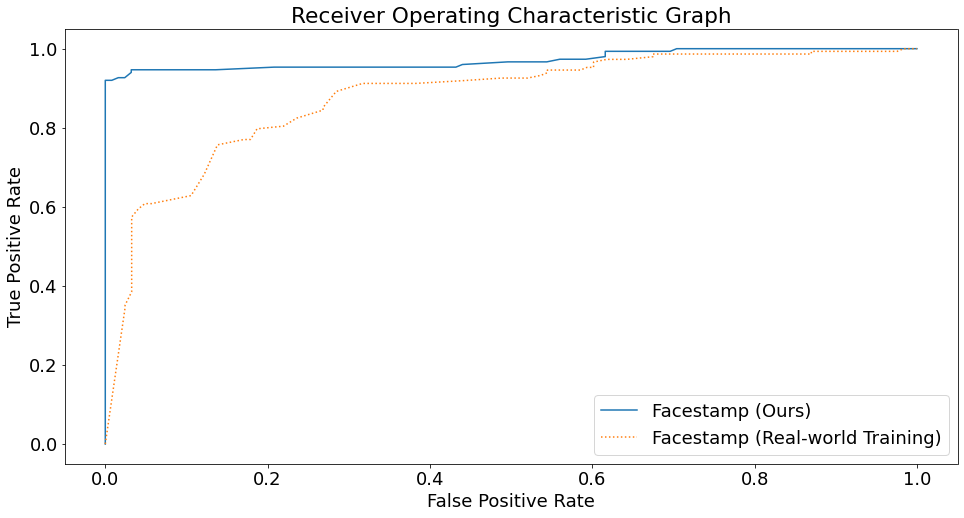

In [21]:
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 18})
for result in results:
    preswap = results[result]['preswap_match']
    swap = results[result]['faceswap_swap_match']
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    fpr, tpr, _ = metrics.roc_curve(gt, prob)
    linestyle = results[result]['linestyle']
    linewidth = 1.5
    name = results[result]['name']
    plt.plot(fpr, tpr, label=f'{name}', linestyle=linestyle)

plt.ylabel('True Positive Rate', )
plt.xlabel('False Positive Rate')
plt.title(f'Receiver Operating Characteristic Graph')
plt.legend()
plt.savefig(f'results/results_roc.png')

plt.show()

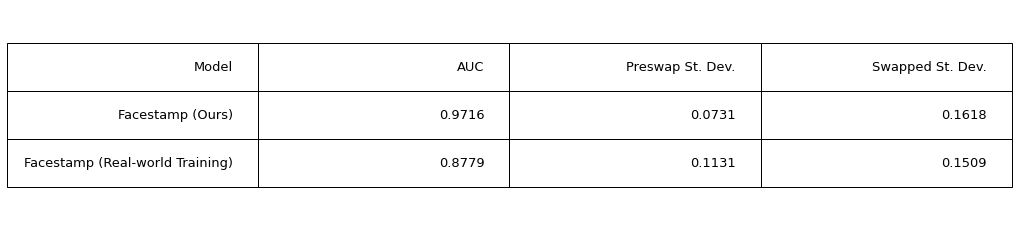

In [22]:
table_data = [['Model','AUC','Preswap St. Dev.','Swapped St. Dev.']]

for result in results:
    preswap = results[result]['preswap_match']
    swap = results[result]['faceswap_swap_match']
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    preswap_std = np.std(preswap)
    swap_std = np.std(swap)
    name = results[result]['name']
    table_data.append([name,'%.4f' % auc, '%.4f' % preswap_std, '%.4f' % swap_std])
    fpr, tpr, _ = metrics.roc_curve(gt, prob)


table_data.sort(key = lambda table_data: table_data[1], reverse=True)

fig, ax = plt.subplots()


table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(3,4)
ax.axis('off')

# plt.figure(figsize=(16,8))
# plt.ylabel('AUC')
# plt.xlabel('Model')
# plt.title(f'AUC Score Graph')
# plt.bar(models, auc_data)
# plt.legend()
plt.savefig(f'results/results_auc.png')
plt.show()

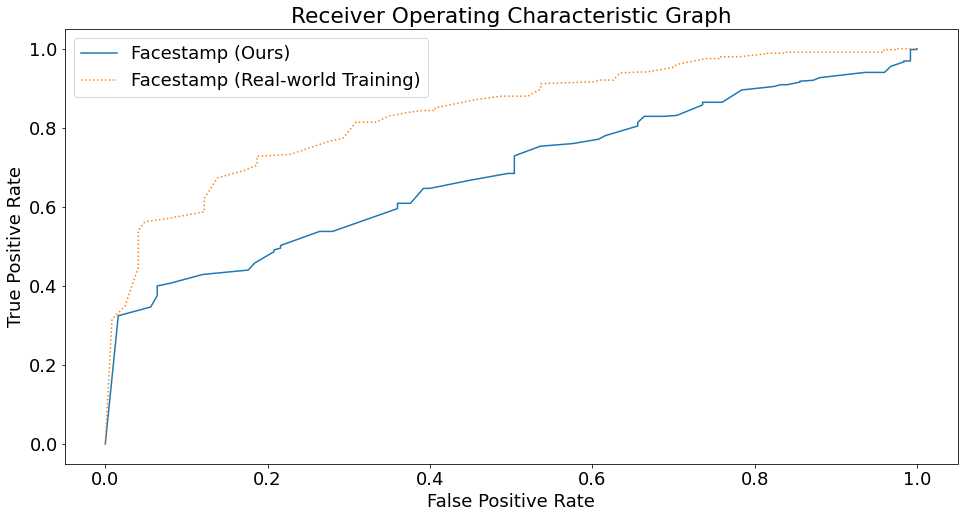

In [23]:
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 18})
for result in results:
    preswap = []
    swap = []
    categories = ['preswap_match', 'preswap_compressed_match', 'preswap_blurred_compressed_match']
    for cat in categories:
        preswap += results[result][cat]
    categories = ['faceswap_swap_match', 'faceswap_swap_compressed_match', 'faceswap_swap_blurred_compressed_match']
    for cat in categories:
        swap = results[result][cat]
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    fpr, tpr, _ = metrics.roc_curve(gt, prob)
    linestyle = results[result]['linestyle']
    linewidth = 1.5
    name = results[result]['name']
    plt.plot(fpr, tpr, label=f'{name}', linestyle=linestyle)

plt.ylabel('True Positive Rate', )
plt.xlabel('False Positive Rate')
plt.title(f'Receiver Operating Characteristic Graph')
plt.legend()
plt.savefig(f'results/results_roc.png')

plt.show()

In [ ]:
table_data = [['Model','AUC','Preswap St. Dev.','Swapped St. Dev.']]

for result in results:
    preswap = []
    swap = []
    categories = ['preswap_match', 'preswap_compressed_match', 'preswap_blurred_compressed_match']
    for cat in categories:
        preswap += results[result][cat]
    categories = ['faceswap_swap_match', 'faceswap_swap_compressed_match', 'faceswap_swap_blurred_compressed_match']
    for cat in categories:
        swap = results[result][cat]
    preswap_true = [1 for _ in range(len(preswap))]
    swap_true = [0 for _ in range(len(swap))]
    gt = preswap_true + swap_true
    prob = preswap + swap
    auc = metrics.roc_auc_score(gt, prob)
    preswap_std = np.std(preswap)
    swap_std = np.std(swap)
    name = results[result]['name']
    table_data.append([name,'%.4f' % auc, '%.4f' % preswap_std, '%.4f' % swap_std])
    fpr, tpr, _ = metrics.roc_curve(gt, prob)


table_data.sort(key = lambda table_data: table_data[1], reverse=True)

fig, ax = plt.subplots()


table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(14)
table.scale(3,4)
ax.axis('off')

# plt.figure(figsize=(16,8))
# plt.ylabel('AUC')
# plt.xlabel('Model')
# plt.title(f'AUC Score Graph')
# plt.bar(models, auc_data)
# plt.legend()
plt.savefig(f'results/results_auc.png')
plt.show()